# Used Cars Dataset 




The dataset contains records of used cars collected from syarah.com Each row represents a used car with a link to its webpage. Other information regarding each car is the brand name, model, manufacturing year, origin, the color of the car, options, capacity of the engine, type of fuel, transmission type, the mileage that the car covered, region price, and negotiable.


<ul><b>Team members:</b>
        <li> Alfaisal alqahtani </li>
        <li> Fatema Buhuligah </li>
        <li> Sarah Alharbi </li>
        <li> Sanad  </li>
        <li> Saleh Alabbas</li>
        </ul>

## Import Libraries 

In [2]:
# imporitng the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Load Data

In [3]:
# import the dataset
df = pd.read_csv("cars.csv")

# Exploratory Data Analysis  (EDA)

In [4]:
df.head()

,Unnamed: 0,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,6153,Toyota,Camry,2020,Saudi,Brown,Semi Full,2.5,Gas,Automatic,38000,Riyadh,1364,False
1,4434,Toyota,FJ,2012,Saudi,Black,Full,4.0,Gas,Automatic,35000,Riyadh,70000,False
2,3537,Chevrolet,Suburban,2009,Saudi,White,Standard,5.3,Gas,Automatic,255,Riyadh,36000,False
3,1666,Ford,Explorer,2016,Other,White,Full,3.5,Gas,Automatic,128644,Riyadh,118000,False
4,3513,Toyota,Corolla,2018,Saudi,White,Standard,1.6,Gas,Automatic,19190,Jeddah,55000,False


In [5]:
# How many rows and columns?
df.shape

(6428, 14)

In [6]:
# What are the column names?
df.columns

Index(['Unnamed: 0', 'Make', 'Type', 'Year', 'Origin', 'Color', 'Options',
       'Engine_Size', 'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price',
       'Negotiable'],
      dtype='object')

#### The features in the dataset
- Make: Car company'name
- Type: Car type
- Year: Production year
- Origin: If  it from Saudi Arabia or Gulf countries or other
- Color: Car color
- Options: Full, Semi Full, Standard
- Engine_Size
- Fule_Type: Gas, Diesel, Hybrid
- Gear_Type: Automatic, Manual
- Mileage: the distance travel
- Region: the region of the car
- Price: price of the car
- Negotiable: (True/False) if the price is negotiable

In [7]:
# Show a quick summary statistics of the numerical variables we have
df.describe()

,Unnamed: 0,Year,Engine_Size,Mileage,Price
count,6428.000000,6428.000000,6428.000000,6.428000e+03,6.428000e+03
mean,4001.298538,2014.120566,3.299284,1.476798e+05,5.395469e+04
std,2308.032075,5.690005,1.523697,3.582324e+05,7.300146e+04
min,0.000000,1964.000000,1.000000,1.000000e+02,0.000000e+00
25%,2003.750000,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,3998.500000,2016.000000,3.000000,1.018995e+05,3.700000e+04
75%,5979.250000,2018.000000,4.500000,1.950000e+05,7.300000e+04
max,8034.000000,2022.000000,9.000000,2.000000e+07,1.150000e+06


<ui>We could notice that: </ui>
<li>
The year of the used cars in our dataset are from 1964 until 2022, Wheras 75% of the cars were from 2018 and older.  </li>

<li>The engine size ranging between 1-litre and 9-litre.</li>

<li>The Mileage is started from 100 to 20000000.</li>

<li>The price ranging from 0 to 1150000. </li>



In [8]:
#checking for total null values
df.isnull().sum() 

Unnamed: 0     0
Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

In [9]:
# what are the types of values in each column?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6428 entries, 0 to 6427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6428 non-null   int64  
 1   Make         6428 non-null   object 
 2   Type         6428 non-null   object 
 3   Year         6428 non-null   int64  
 4   Origin       6428 non-null   object 
 5   Color        6428 non-null   object 
 6   Options      6428 non-null   object 
 7   Engine_Size  6428 non-null   float64
 8   Fuel_Type    6428 non-null   object 
 9   Gear_Type    6428 non-null   object 
 10  Mileage      6428 non-null   int64  
 11  Region       6428 non-null   object 
 12  Price        6428 non-null   int64  
 13  Negotiable   6428 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 659.2+ KB


In [10]:
# show the last 5 rows of the dataset
df.tail(5)

,Unnamed: 0,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
6423,6017,Mercedes,CLS,2014,Saudi,Brown,Full,3.5,Gas,Automatic,130,Jeddah,100000,False
6424,709,GMC,Acadia,2014,Saudi,Red,Full,3.6,Gas,Automatic,250000,Khobar,50000,False
6425,2487,Audi,Q5,2018,Saudi,Another Color,Standard,2.5,Gas,Automatic,17000,Jeddah,138000,False
6426,174,Renault,Symbol,2020,Saudi,White,Standard,1.6,Gas,Automatic,46505,Riyadh,26000,False
6427,1146,Ford,Expedition,2006,Other,Black,Full,5.4,Gas,Automatic,341,Al-Jouf,0,True


In [11]:
# check if there's any duplicated row
df.duplicated().sum()


0

## 1. Popularity of the Car brands

In [12]:
# how many unique value in Make column
df.Make.nunique()

59

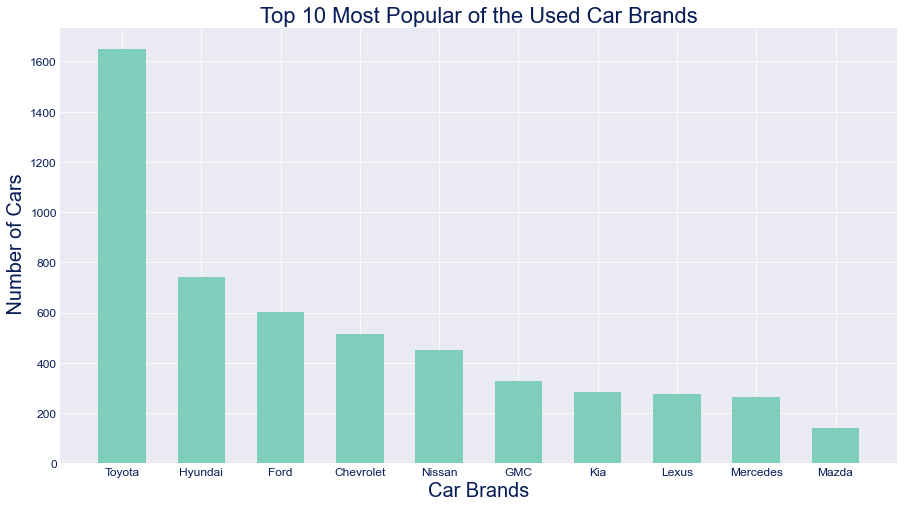

In [13]:
# Bar chart for Top 10 Most Popular of the Used Car Brands
x = df['Make'].value_counts().head(10).index
y = df['Make'].value_counts().head(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Car Brands',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('Top 10 Most Popular of the Used Car Brands',fontsize=22, color ='#081d58');

From the bar chart above, we can see that **Toyota** is the most common car make in our dataset.

## 2. Popularity of the Car Type

In [14]:
# how many unique value in Type column
df.Type.nunique()

356

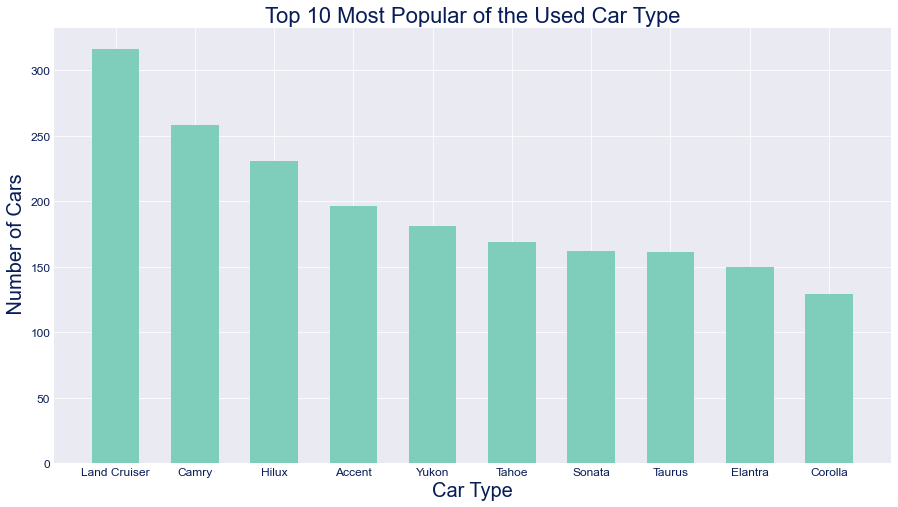

In [15]:
# Bar chart for Top 10 Most Popular of the Used Car Type
x = df['Type'].value_counts().head(10).index
y = df['Type'].value_counts().head(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Car Type',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('Top 10 Most Popular of the Used Car Type',fontsize=22, color ='#081d58');

From the bar chart above, we can see that **Land Cruiser** is the most common car type in our dataset.

## 3. What are the most popular years of the cars

In [16]:
# what are the unique value in Year column
df.Year.unique()

array([2020, 2012, 2009, 2016, 2018, 2003, 1998, 2013, 2017, 2010, 2014,
       2019, 2015, 2002, 2006, 2001, 2021, 2007, 2008, 2011, 2004, 2005,
       1983, 1990, 1999, 1985, 1996, 1997, 1995, 2000, 1994, 1986, 1989,
       1991, 1993, 1992, 1979, 1977, 1972, 1970, 1988, 1964, 1978, 2022,
       1975, 1987, 1980, 1981, 1982, 1965, 1984])

In [17]:
# normalize the year of the cars
freq = df.Year.value_counts(normalize=True)
#replace the small categories to "other"
year_updated = df.Year.replace(freq[freq<0.05].index , "other")

# Check after the edit (print with percentage )
year_updated.value_counts(normalize=True).mul(100)

other    27.613566
2016     14.810205
2017     10.112010
2015      9.769757
2018      9.738643
2019      7.685128
2014      7.016179
2020      6.907281
2013      6.347231
Name: Year, dtype: float64

 As we can see from the above output, **year 2016 followed by 2017** are the most common production year of the used car in our dataset. **Which represent almost a quarter of our dataset**.

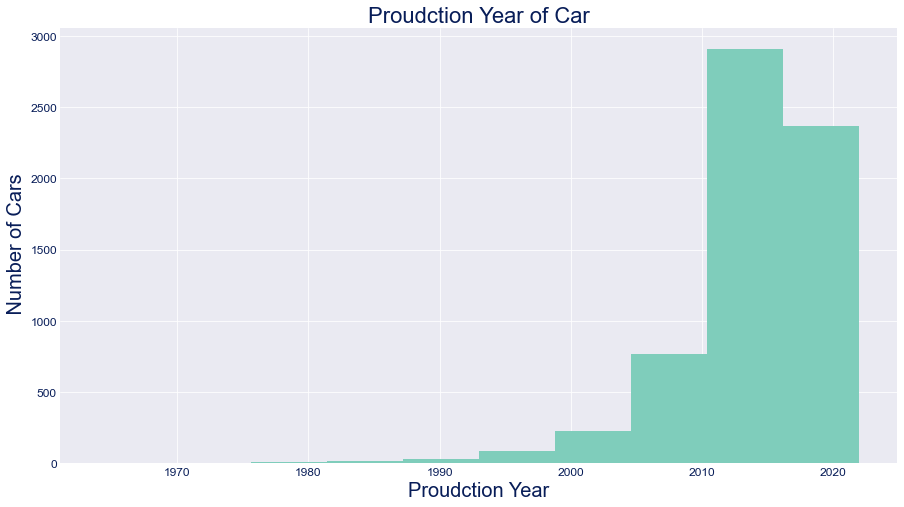

In [18]:
# histogram to show the production year of the cars
plt.figure(figsize=(15,8))
df.Year.hist(color='#7fcdbb')
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.xlabel('Proudction Year',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('Proudction Year of Car',fontsize=22, color ='#081d58');

## 4. The origin of the car?

In [19]:
# what are the unique value in Origin column
df.Origin.unique()

array(['Saudi', 'Other', 'Gulf Arabic', 'Unknown'], dtype=object)

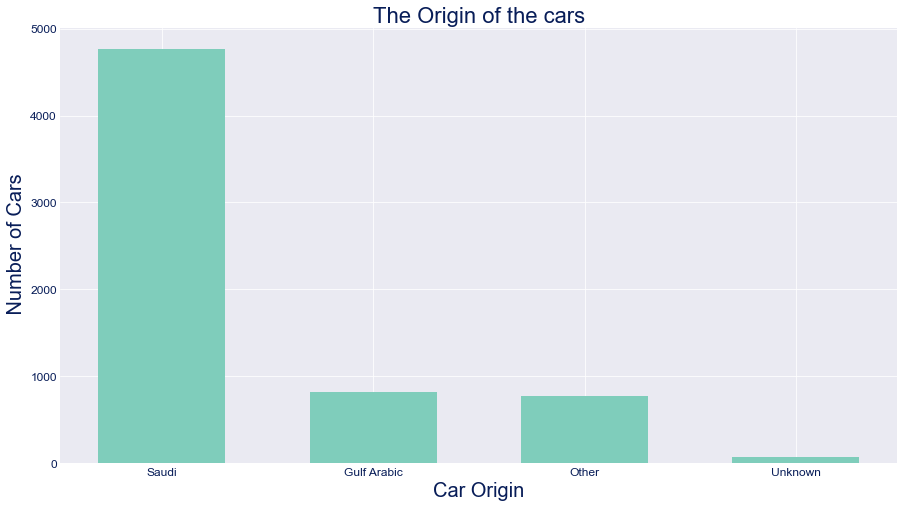

In [20]:
# Bar chart for the Origin of the cars
x = df['Origin'].value_counts().index
y = df['Origin'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Car Origin',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('The Origin of the cars',fontsize=22, color ='#081d58');

From the bar chart above, we can see that more than 4500 cars from **Saudi** then from the Gulf arabic countries then Other.

In [21]:
# check the Origin for Unknown
df[df.Origin == 'Unknown'].Origin.value_counts()

Unknown    69
Name: Origin, dtype: int64

## 5. Popularity of the Car Colors

In [22]:
# what are the unique value in Color column
df.Color.nunique()

15

In [23]:
# what are the unique value in Color column
df['Color'].value_counts(normalize=True).mul(100)


White            43.294960
Black            11.481021
Silver           11.356565
Grey              8.945240
Another Color     6.565028
Brown             3.889235
Red               3.578096
Blue              2.784692
Golden            2.738021
Navy              2.084630
Bronze            1.897946
Oily              0.591164
Green             0.513379
Yellow            0.155569
Orange            0.124456
Name: Color, dtype: float64

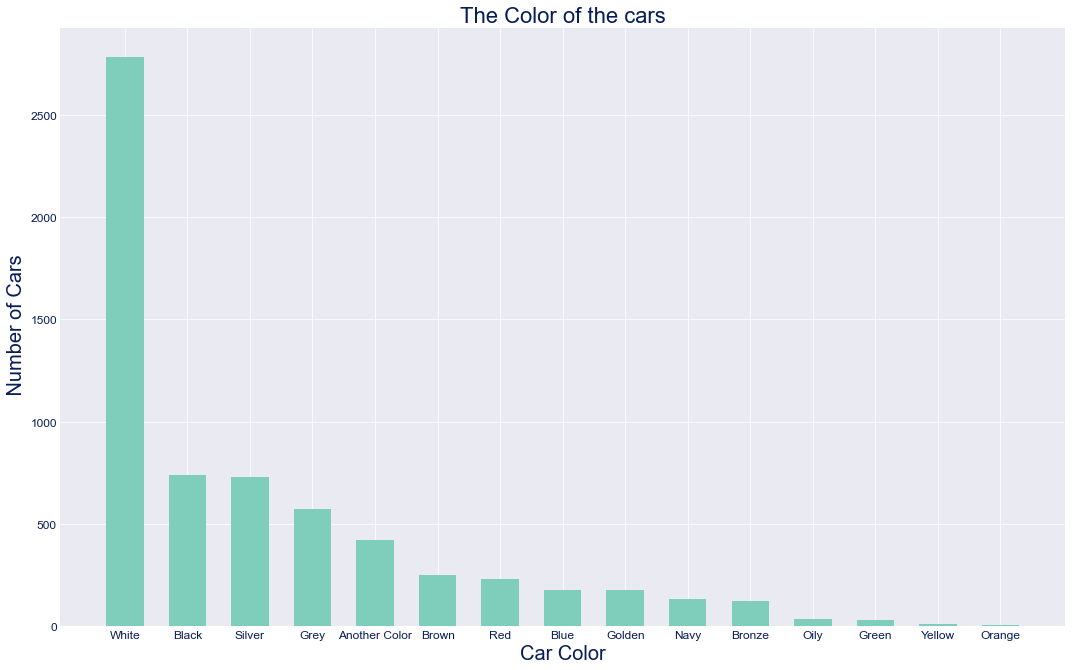

In [24]:
# Bar chart for the Color of the cars
x = df['Color'].value_counts(normalize = True).index
y = df['Color'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(18,11))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Car Color',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('The Color of the cars',fontsize=22, color ='#081d58');

From the bar chart above, we can see that **the White color** is preferred in Saudi! it is the most common car color in our dataset with more than 2500 white car.

## 6. The car type of option

In [25]:
# how many unique value in Options column
df.Options.nunique()

3

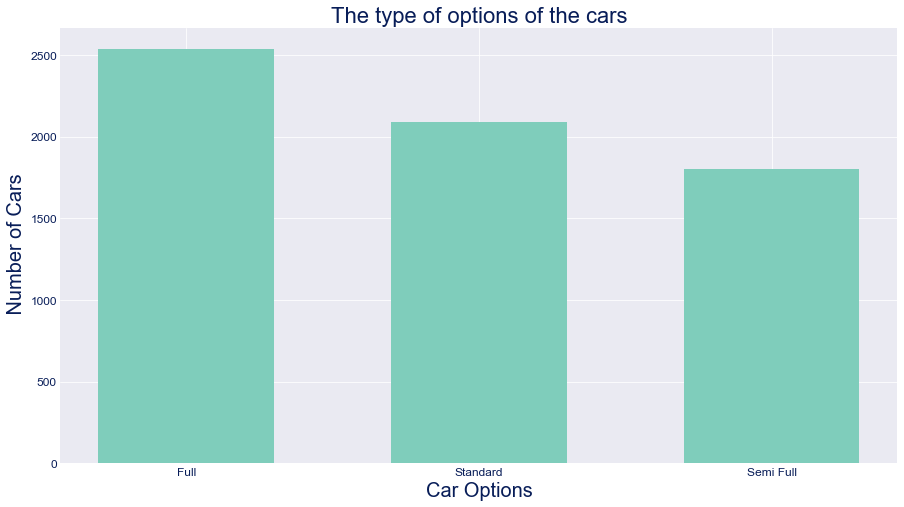

In [26]:
# Bar chart for the Options of the cars
x = df['Options'].value_counts().index
y = df['Options'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Car Options',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('The type of options of the cars',fontsize=22, color ='#081d58');

Most of the car is **Full Option** in the dataset.

## 7. The engine size of the car

In [27]:
# what are the unique value in Engine_Size column
df.Engine_Size.nunique()

74

In [28]:
# summary statistics of Engine_Size column
df.Engine_Size.describe()

count    6428.000000
mean        3.299284
std         1.523697
min         1.000000
25%         2.000000
50%         3.000000
75%         4.500000
max         9.000000
Name: Engine_Size, dtype: float64

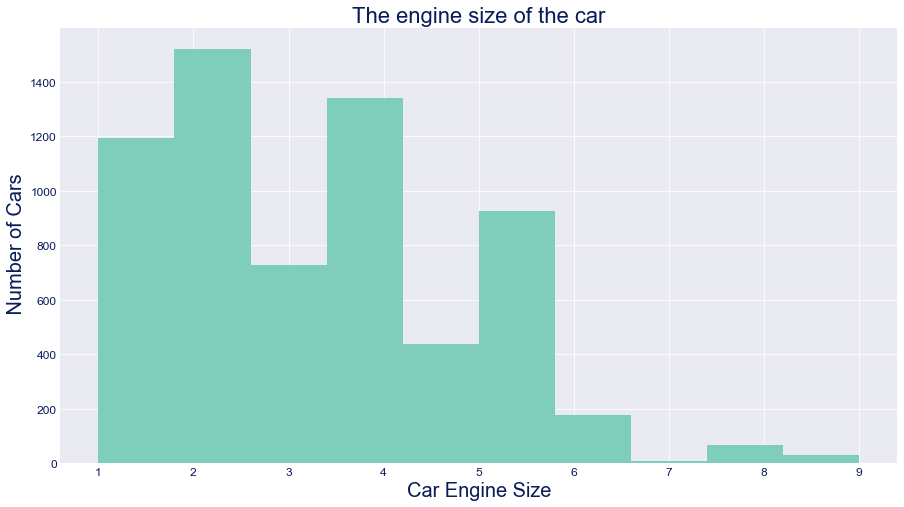

In [29]:
# histogram to show the production year of the cars
plt.figure(figsize=(15,8))
df.Engine_Size.hist(color='#7fcdbb')
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.xlabel('Car Engine Size',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('The engine size of the car',fontsize=22, color ='#081d58');

**ALFAISAL COMMENTS**

## 8. The fuel type of cars

In [30]:
# how many unique value in Fuel_Type column
df.Fuel_Type.nunique()

3

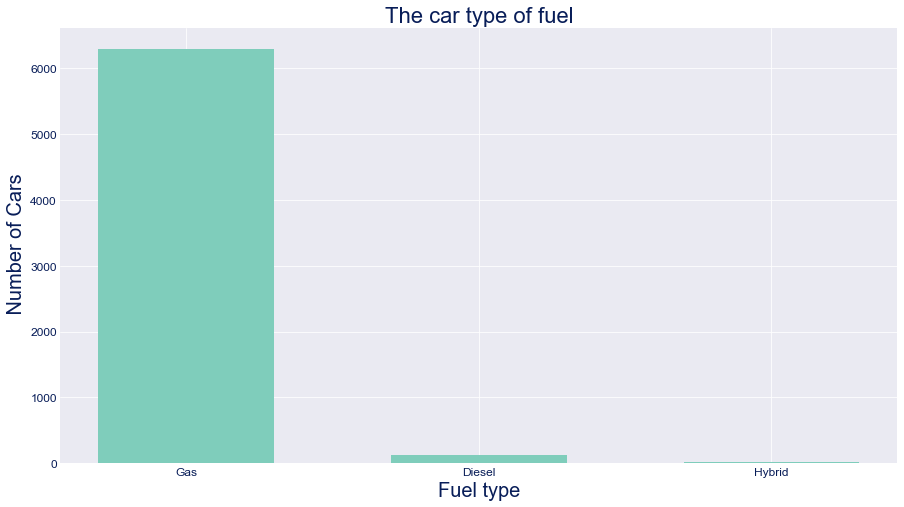

In [31]:
# Bar chart for the fuel type of the cars
x = df['Fuel_Type'].value_counts().index
y = df['Fuel_Type'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Fuel type',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('The car type of fuel',fontsize=22, color ='#081d58');

In [32]:
# summary of Fuel_Type column
df.Fuel_Type.describe()

count     6428
unique       3
top        Gas
freq      6290
Name: Fuel_Type, dtype: object

From the above outputs, we can say that **Gas** is the most fuel type in the dataset with 6290 cars with Gas fuel type, where as the rest 138 cars are using either Diseal or Hybird.

## 9. The gear type of cars

In [33]:
# how many unique value in Gear_Type column
df.Gear_Type.nunique()

2

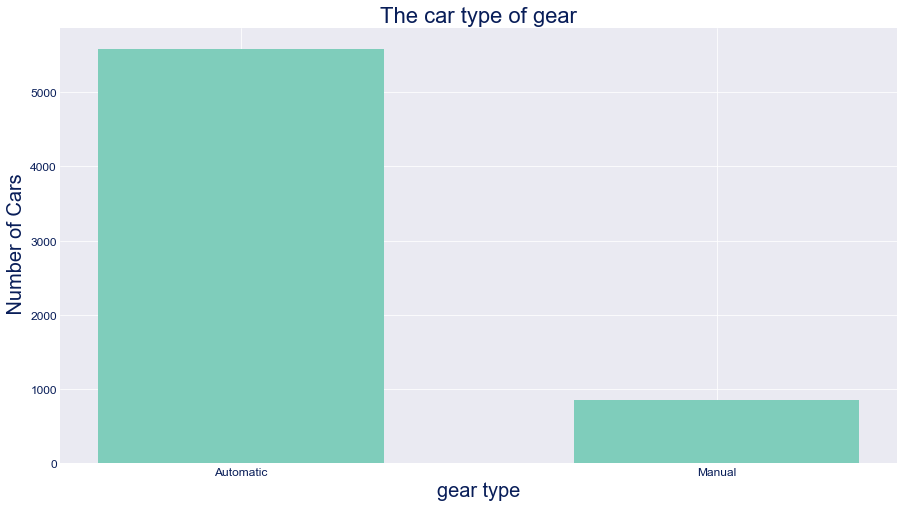

In [34]:
# Bar chart for the gear type of the cars
x = df['Gear_Type'].value_counts().index
y = df['Gear_Type'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('gear type',fontsize=20, color ='#081d58')
plt.ylabel(' Number of Cars',fontsize=20, color ='#081d58')
plt.title('The car type of gear',fontsize=22, color ='#081d58');

The most Gear type in this dataset is **Automatic gear**

## 10. The distance travel of cars

In [35]:
# summary statistics of Mileage column
df.Mileage.describe()

count    6.428000e+03
mean     1.476798e+05
std      3.582324e+05
min      1.000000e+02
25%      3.700000e+04
50%      1.018995e+05
75%      1.950000e+05
max      2.000000e+07
Name: Mileage, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


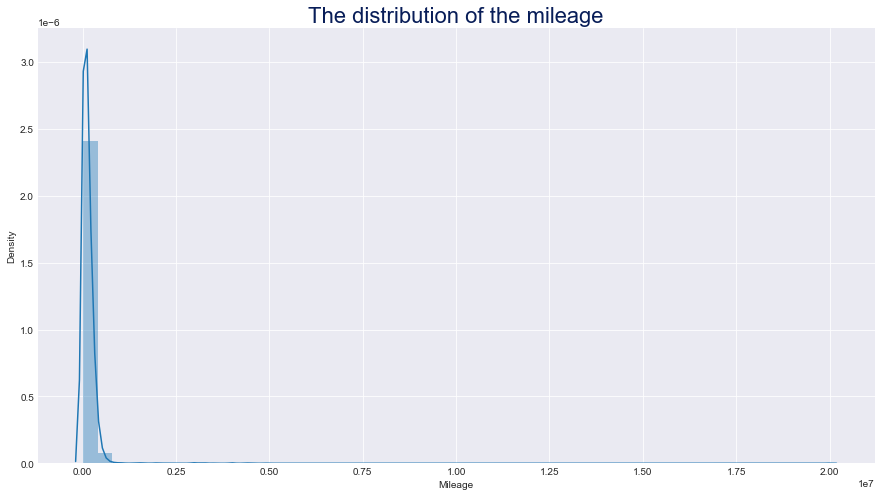

In [36]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
sns.distplot(df['Mileage'])
plt.title('The distribution of the mileage',fontsize=22, color ='#081d58');

**COMMENTS**

## 11. Popularity of the Car Region

In [191]:
# how many unique value in Region column
df.Region.nunique()

27

In [192]:
# what are the unique value in Region column
df.Region.unique()

array(['Riyadh', 'Jeddah', 'Abha', 'Dammam', 'Qassim', 'Taef',
       'Al-Medina', 'Aseer', 'Wadi Dawasir', 'Al-Ahsa', 'Tabouk',
       'Makkah', 'Jazan', 'Khobar', 'Al-Jouf', 'Hafar Al-Batin', 'Yanbu',
       'Jubail', 'Najran', 'Al-Baha', 'Arar', 'Hail', 'Al-Namas',
       'Sakaka', 'Besha', 'Qurayyat', 'Sabya'], dtype=object)

**WE CAN COMBAIN DAMMAM & KHOBAR BECAUSE THE DISTANCE BETWEEN THEM IS LESS THAN 20 KM**

In [193]:
# Change Khobar to Dammam as the distance between them is less than 20 KM
df.loc[df['Region'] == 'Khobar', 'Region'] = 'Dammam'
df.Region.nunique()

26

In [194]:
# normalize the year of the cars
freq = df.Region.value_counts()
#replace the Region with less than 100 cars to "other" category
region_updated = df.Region.replace(freq[freq<100].index , "other")

#Check after the edit (print with percentage )
region_updated.value_counts(normalize=True).mul(100)

Riyadh       39.887990
Dammam       18.357187
Jeddah       13.332296
other         8.945240
Qassim        3.889235
Al-Medina     3.795893
Aseer         2.831363
Al-Ahsa       2.831363
Makkah        2.815806
Taef          1.726820
Tabouk        1.586808
Name: Region, dtype: float64

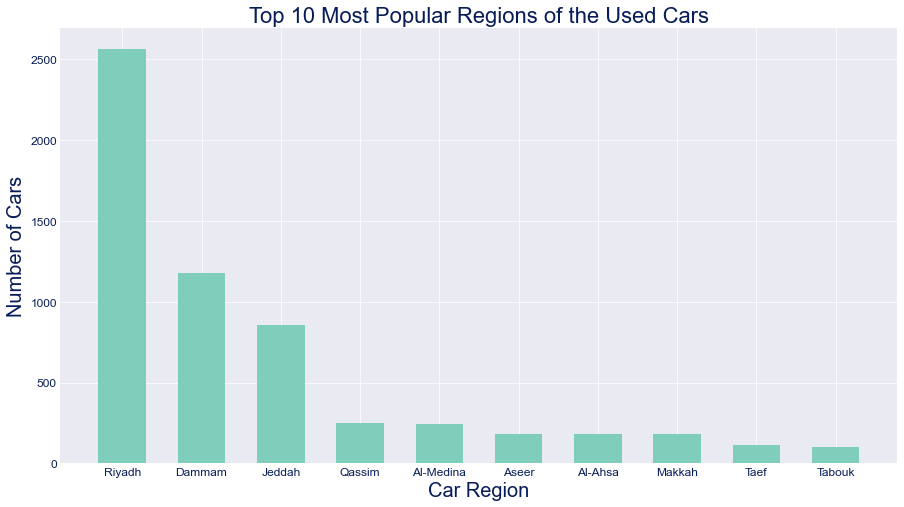

In [195]:
# Bar chart for Top 10 Most Popular Regions of the Used Cars
x = df['Region'].value_counts().head(10).index
y = df['Region'].value_counts().head(10)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Car Region',fontsize=20, color ='#081d58')
plt.ylabel('Number of Cars',fontsize=20, color ='#081d58')
plt.title('Top 10 Most Popular Regions of the Used Cars',fontsize=22, color ='#081d58');


As we can see from the above bar chart, **Riyadh** Region has the most used cars in our dataset.

## 12. Cars Price

In [196]:
# number of observation in each unique price value
df.Price.value_counts()

0         2021
45000      121
35000      107
55000      102
30000       94
          ... 
56600        1
349000       1
445000       1
1013         1
1046         1
Name: Price, Length: 488, dtype: int64

In [197]:
# check the price if less than 100
df[df.Price < 100].Price.value_counts()

0    2021
1       1
Name: Price, dtype: int64

C:\Users\Fatemah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


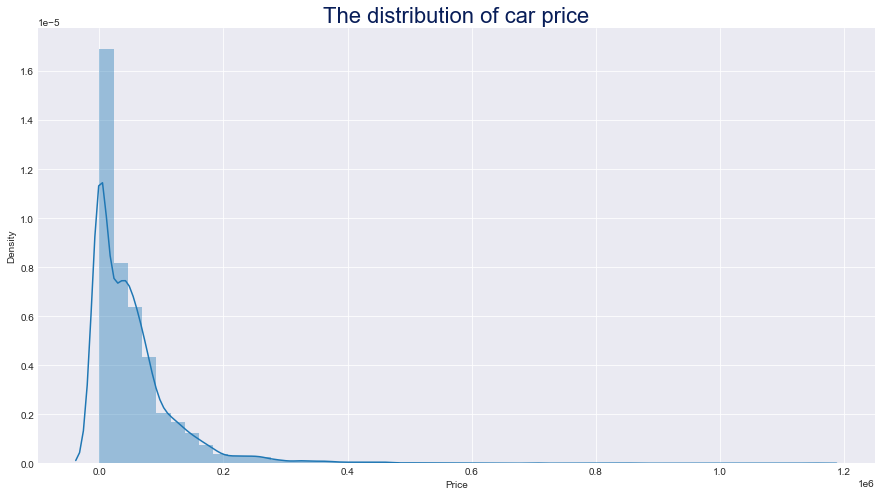

In [17]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
sns.distplot(df['Price'])
plt.title('The distribution of car price',fontsize=22, color ='#081d58');

**COMMENTS**

## 13. The negotiability of the cars prices

In [198]:
# what are the unique value in Negotiable column
df.Negotiable.unique()

array([False,  True])

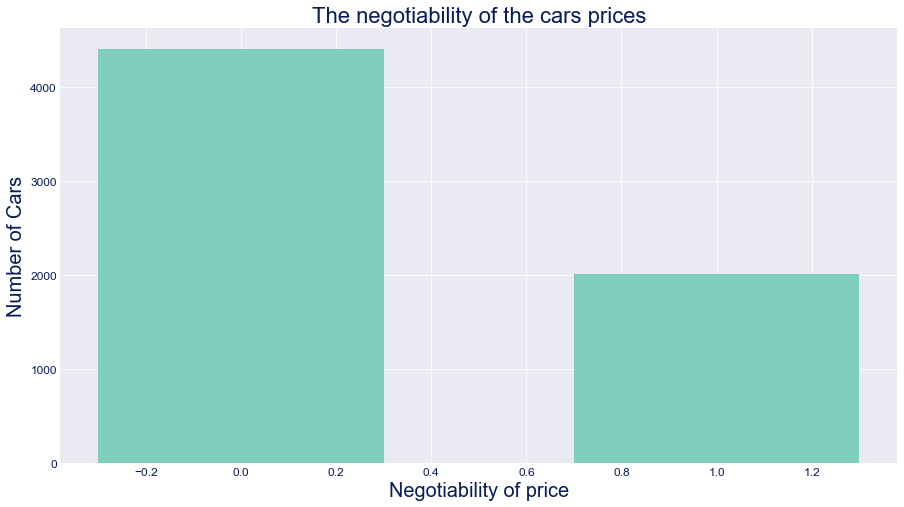

In [25]:
# Bar chart showing the negotiability of the cars prices
x = df['Negotiable'].value_counts().index
y = df['Negotiable'].value_counts()

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081d58',fontsize=12)
plt.yticks(color ='#081d58',fontsize=12)
plt.bar(x, y, color= ('#7fcdbb'), width=0.6)
plt.xlabel('Negotiability of price',fontsize=20, color ='#081d58')
plt.ylabel('Number of Cars',fontsize=20, color ='#081d58')
plt.title('The negotiability of the cars prices',fontsize=22, color ='#081d58');

**NEED SOME CHANGE SO THE LABEL APPEAR (FALSE/TRUE)**

# Data Cleaning

#### Issues:
- Drop [Unnamed: 0] column  
- Drop all the observations in [Price] column with the values (0 and 1)
- Handle the outliers in the Mileage column

In [51]:
# first step is making a copy of the dataframe
df_clean = df.copy()

## Remove the Unnecessary column

In [52]:
# Drop 'Unnamed: 0' column 
df_clean.drop(['Unnamed: 0'], axis = 1, inplace = True)

## Remove rows with the values (0 and 1) in the Target Variable

In [53]:
# Drop all the observations in [Price] column with the values (0 and 1)
df_clean.drop(df_clean.loc[df_clean['Price'] <= 1].index, inplace=True)

In [71]:
# to check if the price with value 0 & 1 deleted or not
df_clean[df_clean.Price < 100].Price.value_counts()

Series([], Name: Price, dtype: int64)

## not Finished Yet - Comparsion between the hist of Price before and after "Normalizatiom"

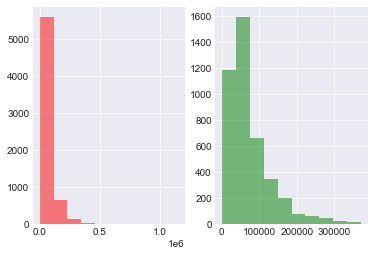

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

list1 = df.Price
list2 = df_clean.Price

fig, ax = plt.subplots(1,2)
ax[0].hist(list1, alpha = 0.5, color = 'r')
ax[1].hist(list2, alpha = 0.5, color = 'g')
plt.show()


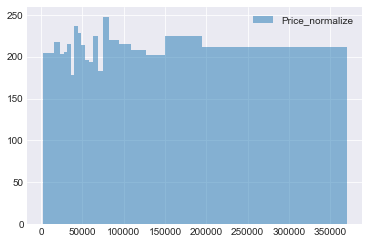

In [86]:
from matplotlib import pyplot
import numpy

#ins=df['Price'].quantile([0,.05,0.1,0.15,0.20,0.25,0.3,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]).to_list()
bins1 =df_clean['Price'].quantile([0,.05,0.1,0.15,0.20,0.25,0.3,0.35,0.40,0.45,0.5,0.55,0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1]).to_list()



#pyplot.hist(df.Price,bins=bins, alpha=0.5, label='Price')
pyplot.hist(df_clean.Price,bins=bins1, alpha=0.5, label='Price_normalize')
pyplot.legend(loc='upper right')
pyplot.show()

In [81]:
df_clean.Price.describe()

count      4226.000000
mean      75108.056555
std       59019.692049
min        1959.000000
25%       36000.000000
50%       58000.000000
75%       94000.000000
max      370000.000000
Name: Price, dtype: float64

In [77]:
rr=sorted(df_clean["Price"])
quantile1, quantile3= np.percentile(rr,[1,99])

In [78]:
print(quantile1,quantile3)


1862.9499999999998 375000.0


In [79]:
df_clean=df_clean[(df_clean.Price < quantile3) & (df_clean.Price >= quantile1 )]
df_clean.shape

(4226, 13)

In [80]:
df.Price.describe()

count    6.428000e+03
mean     5.395469e+04
std      7.300146e+04
min      0.000000e+00
25%      0.000000e+00
50%      3.700000e+04
75%      7.300000e+04
max      1.150000e+06
Name: Price, dtype: float64

## Handle the outliers from the Mileage column 

In [56]:
rr=sorted(df_clean["Mileage"])
quantile1, quantile3= np.percentile(rr,[1,99])

In [57]:
print(quantile1,quantile3)


121.05000000000001 522849.9999999995


In [58]:
df_clean=df_clean[(df_clean.Mileage < quantile3) & (df_clean.Mileage >= quantile1 )]
df_clean.shape

(4316, 13)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


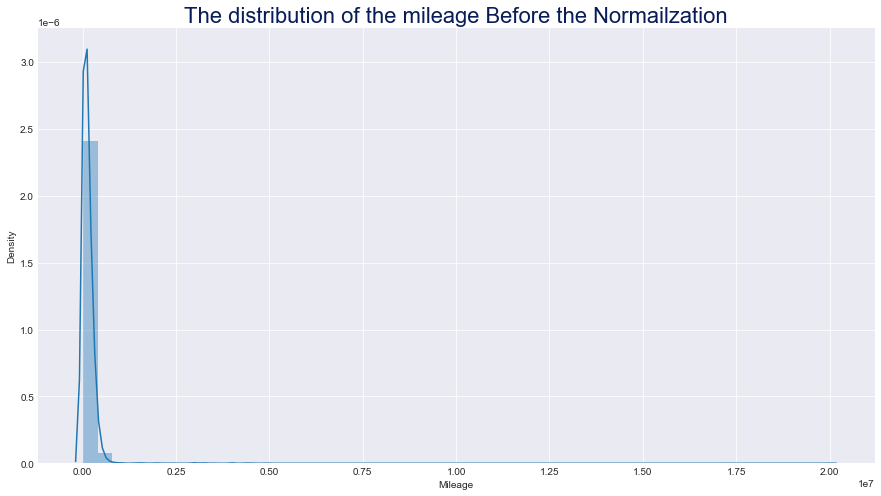

In [112]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
sns.distplot(df['Mileage'])
plt.title('The distribution of the mileage Before the Normailzation',fontsize=22, color ='#081d58');

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


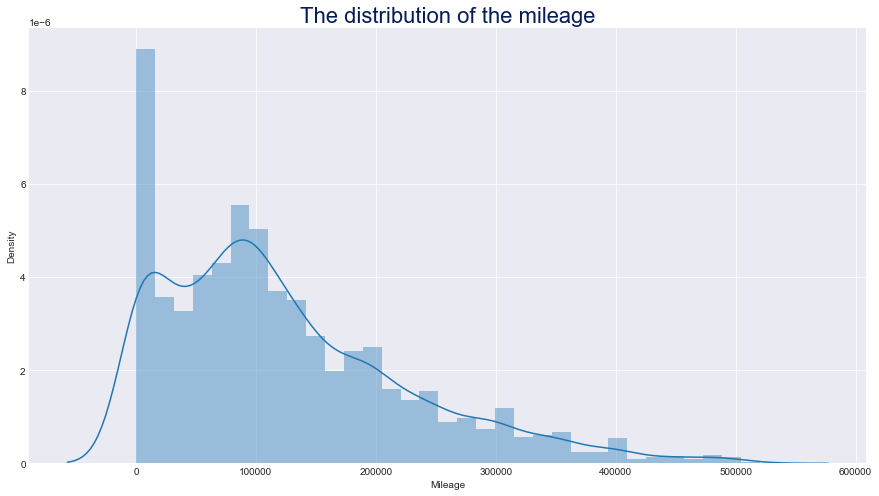

In [60]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
sns.distplot(df_clean['Mileage'])
plt.title('The distribution of the mileage after the Normailzation',fontsize=22, color ='#081d58');

## Add new column for the country of car manufacturers

In [114]:

df_country = pd.read_csv("/Users/sarahalharbi/Documents/DS_projects/cars_project/saudi_used_cars_ml/data/Cars_Origin.csv")


#Data source: https://www.canstarblue.com.au/vehicles/car-country-of-origin/ and some of them are manually 

In [115]:
#convert the dataframe to dict 
country_dict = dict(zip(df_country.Make, df_country.Country))

In [116]:
df_clean['Country'] = df_clean['Make'].map(country_dict) 
df_clean['Country'] = df_clean['Make'].map(country_dict).fillna('Other')



In [117]:
df_clean.Country.value_counts(normalize=True).mul(100)

Japan             42.049219
America           26.644581
South Korea       18.338855
Germany            7.808803
England            2.106010
China              1.609087
France             0.899195
Italy              0.331283
Other              0.165641
Czech Republic     0.047326
Name: Country, dtype: float64

In [118]:
df_clean.Country.isnull().sum()

0

Text(0.5, 1.0, 'Top 10 Most Popular of the Used Car Brands')

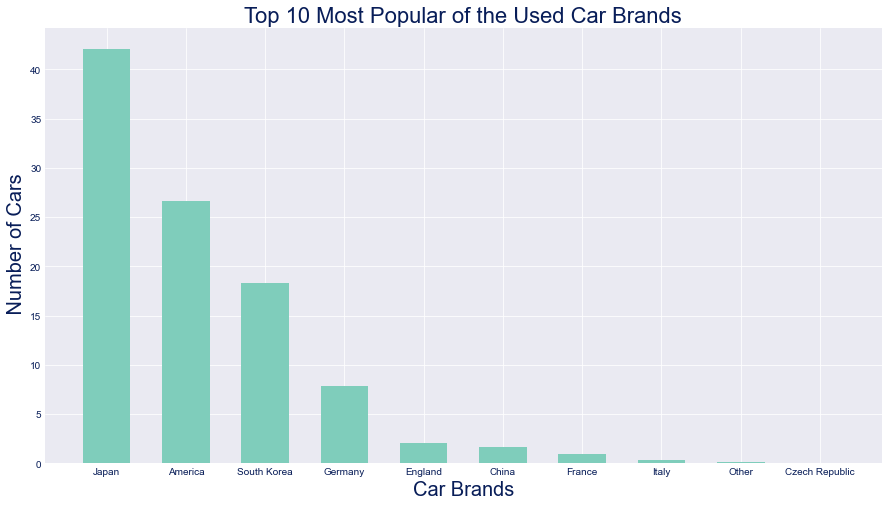

In [119]:
x = df_clean['Country'].value_counts(normalize=True).index
y = df_clean['Country'].value_counts(normalize=True).mul(100)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,8))
plt.xticks( color ='#081D58')
plt.yticks(color ='#081D58')
plt.bar(x, y, color= ('#7FCDBB'), width=0.6)
plt.xlabel('Car Brands',fontsize=20, color ='#081D58')
plt.ylabel('Percentage of Cars',fontsize=20, color ='#081D58')
plt.title('The Country of Car Manufacturers',fontsize=22, color ='#081D58')